In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=01689d658adb739458fda893ca6bb1aac4e16cb347e2d1a5a85417a08eaf43d4
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


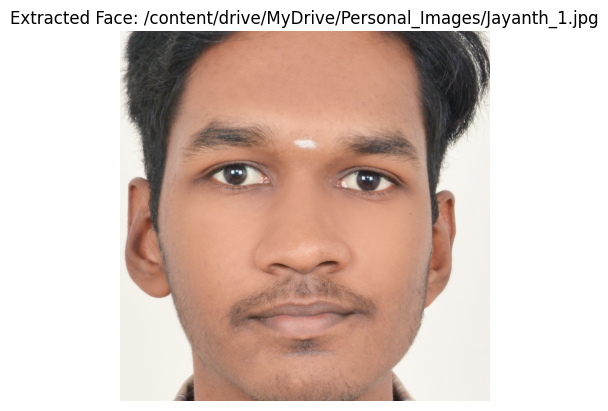

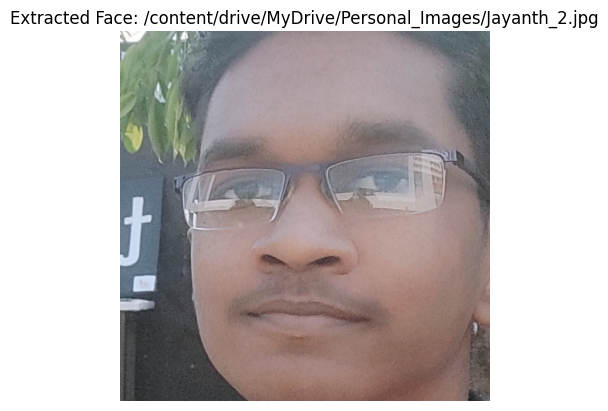

25-02-26 16:20:28 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:01<00:00, 318MB/s]


Are they the same person? True


In [6]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

def detect_face(image_path):
    try:
        face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend='opencv')
        if face_objs:
            face = face_objs[0]['face']
            facial_area = face_objs[0]['facial_area']
            return face, facial_area  # Returning the face and bounding box
        else:
            print(f"No face detected in {image_path}.")
            return None, None
    except Exception as e:
        print(f"Error detecting face in {image_path}: {e}")
        return None, None

# Function to display extracted faces
def display_faces(image_path, facial_area):
    if facial_area is not None:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Ensure facial_area is a dictionary with correct keys
        if isinstance(facial_area, dict) and all(k in facial_area for k in ["x", "y", "w", "h"]):
            x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
            cropped_face = img[y:y+h, x:x+w]

            plt.imshow(cropped_face)
            plt.axis("off")
            plt.title(f"Extracted Face: {image_path}")
            plt.show()
        else:
            print(f"Invalid facial_area format for {image_path}.")
    else:
        print(f"Cannot display face for {image_path}.")

# Function to compare two extracted face images
def compare_faces(image1_path, image2_path):
    try:
        result = DeepFace.verify(image1_path, image2_path, model_name='VGG-Face')
        return result
    except Exception as e:
        print(f"Error comparing faces: {e}")
        return None

# Load first image and extract face
image1_path = "/content/drive/MyDrive/Personal_Images/Jayanth_1.jpg"  # Change to actual path
face1, facial_area1 = detect_face(image1_path)

# Load second image from mounted drive and extract face
image2_path = "/content/drive/MyDrive/Personal_Images/Jayanth_2.jpg"  # Change path accordingly
face2, facial_area2 = detect_face(image2_path)

# Display extracted faces
display_faces(image1_path, facial_area1)
display_faces(image2_path, facial_area2)

# Compare faces if both are successfully extracted
if face1 is not None and face2 is not None:
    comparison_result = compare_faces(image1_path, image2_path)
    if comparison_result:
        print("Are they the same person?", comparison_result["verified"])
    else:
        print("Comparison failed.")
else:
    print("Face extraction failed for one or both images.")


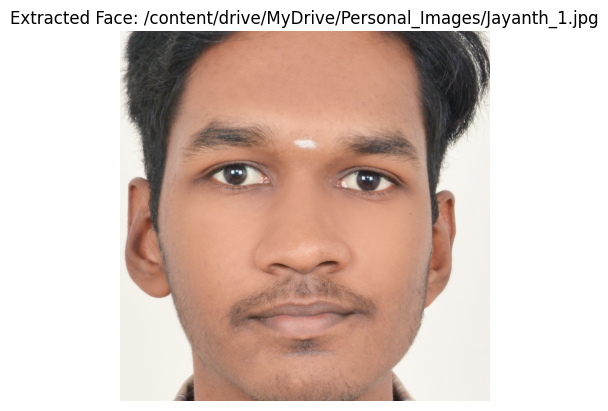

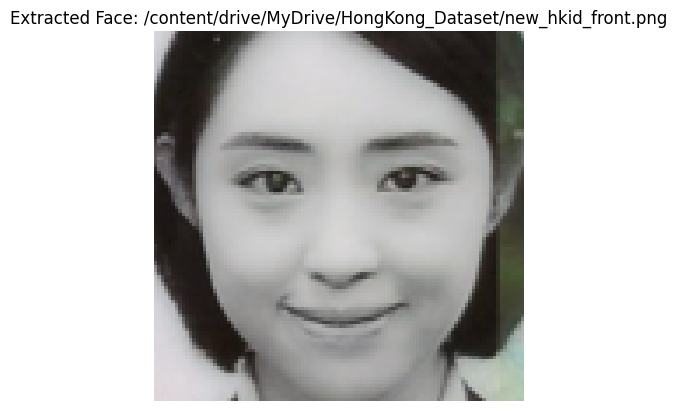

Are they the same person? False


In [7]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

def detect_face(image_path):
    try:
        face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend='opencv')
        if face_objs:
            face = face_objs[0]['face']
            facial_area = face_objs[0]['facial_area']
            return face, facial_area  # Returning the face and bounding box
        else:
            print(f"No face detected in {image_path}.")
            return None, None
    except Exception as e:
        print(f"Error detecting face in {image_path}: {e}")
        return None, None

# Function to display extracted faces
def display_faces(image_path, facial_area):
    if facial_area is not None:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Ensure facial_area is a dictionary with correct keys
        if isinstance(facial_area, dict) and all(k in facial_area for k in ["x", "y", "w", "h"]):
            x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
            cropped_face = img[y:y+h, x:x+w]

            plt.imshow(cropped_face)
            plt.axis("off")
            plt.title(f"Extracted Face: {image_path}")
            plt.show()
        else:
            print(f"Invalid facial_area format for {image_path}.")
    else:
        print(f"Cannot display face for {image_path}.")

# Function to compare two extracted face images
def compare_faces(image1_path, image2_path):
    try:
        result = DeepFace.verify(image1_path, image2_path, model_name='VGG-Face')
        return result
    except Exception as e:
        print(f"Error comparing faces: {e}")
        return None

# Load first image and extract face
image1_path = "/content/drive/MyDrive/Personal_Images/Jayanth_1.jpg"  # Change to actual path
face1, facial_area1 = detect_face(image1_path)

# Load second image from mounted drive and extract face
image2_path = "/content/drive/MyDrive/HongKong_Dataset/new_hkid_front.png"  # Change path accordingly
face2, facial_area2 = detect_face(image2_path)

# Display extracted faces
display_faces(image1_path, facial_area1)
display_faces(image2_path, facial_area2)

# Compare faces if both are successfully extracted
if face1 is not None and face2 is not None:
    comparison_result = compare_faces(image1_path, image2_path)
    if comparison_result:
        print("Are they the same person?", comparison_result["verified"])
    else:
        print("Comparison failed.")
else:
    print("Face extraction failed for one or both images.")


Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/Jayanth_2.jpg
25-02-26 16:37:35 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 159MB/s]


Face detected using retinaface for /content/drive/MyDrive/Personal_Images/Jayanth_2.jpg
Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Both faces detected successfully!


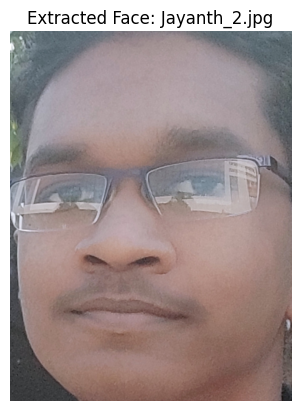

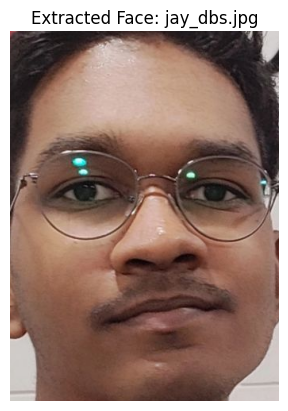

Are they the same person? True


In [12]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import os

# List of backends to try
BACKENDS = ["retinaface", "mtcnn", "opencv", "ssd", "dlib"]

# Function to detect face in an image using DeepFace
def detect_face(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None, None

    for backend in BACKENDS:
        try:
            print(f"Trying backend: {backend} for {image_path}")
            face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend=backend)
            if face_objs:
                face = face_objs[0]['face']
                facial_area = face_objs[0]['facial_area']
                print(f"Face detected using {backend} for {image_path}")
                return face, facial_area  # Return the extracted face and bounding box
        except Exception as e:
            print(f"Backend {backend} failed for {image_path}: {e}")

    print(f"Failed to detect face in {image_path} using all backends.")
    return None, None

# Function to display extracted faces
def display_faces(image_path, facial_area):
    if facial_area is not None:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if isinstance(facial_area, dict) and all(k in facial_area for k in ["x", "y", "w", "h"]):
            x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
            cropped_face = img[y:y+h, x:x+w]

            plt.imshow(cropped_face)
            plt.axis("off")
            plt.title(f"Extracted Face: {os.path.basename(image_path)}")
            plt.show()
        else:
            print(f"Invalid facial_area format for {image_path}.")
    else:
        print(f"Cannot display face for {image_path}.")

# Function to compare two images
def compare_faces(image1_path, image2_path):
    try:
        result = DeepFace.verify(image1_path, image2_path, model_name='VGG-Face')
        return result
    except Exception as e:
        print(f"Error comparing faces: {e}")
        return None

# Image paths
image1_path = "/content/drive/MyDrive/Personal_Images/Jayanth_2.jpg"  # Update as needed
image2_path = "/content/drive/MyDrive/Personal_Images/jay_dbs.jpg"  # Update as needed

# Detect faces with automatic backend switching
face1, facial_area1 = detect_face(image1_path)
face2, facial_area2 = detect_face(image2_path)

# If both faces are detected, proceed with comparison
if face1 is not None and face2 is not None:
    print("Both faces detected successfully!")

    # Display the extracted faces
    display_faces(image1_path, facial_area1)
    display_faces(image2_path, facial_area2)

    # Compare faces
    comparison_result = compare_faces(image1_path, image2_path)
    if comparison_result:
        print("Are they the same person?", comparison_result["verified"])
    else:
        print("Comparison failed.")
else:
    print("Face extraction failed for one or both images.")


Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/Jayanth_2.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/Jayanth_2.jpg
Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jayanth.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jayanth.jpg
Both faces detected successfully!


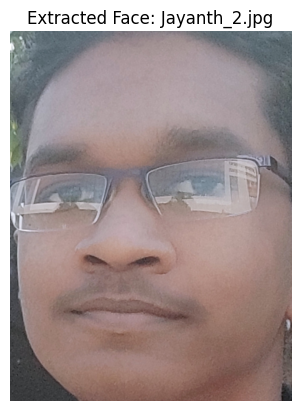

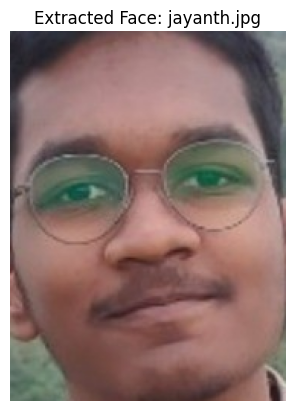

Are they the same person? True


In [13]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import os

# List of backends to try
BACKENDS = ["retinaface", "mtcnn", "opencv", "ssd", "dlib"]

# Function to detect face in an image using DeepFace
def detect_face(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None, None

    for backend in BACKENDS:
        try:
            print(f"Trying backend: {backend} for {image_path}")
            face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend=backend)
            if face_objs:
                face = face_objs[0]['face']
                facial_area = face_objs[0]['facial_area']
                print(f"Face detected using {backend} for {image_path}")
                return face, facial_area  # Return the extracted face and bounding box
        except Exception as e:
            print(f"Backend {backend} failed for {image_path}: {e}")

    print(f"Failed to detect face in {image_path} using all backends.")
    return None, None

# Function to display extracted faces
def display_faces(image_path, facial_area):
    if facial_area is not None:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if isinstance(facial_area, dict) and all(k in facial_area for k in ["x", "y", "w", "h"]):
            x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
            cropped_face = img[y:y+h, x:x+w]

            plt.imshow(cropped_face)
            plt.axis("off")
            plt.title(f"Extracted Face: {os.path.basename(image_path)}")
            plt.show()
        else:
            print(f"Invalid facial_area format for {image_path}.")
    else:
        print(f"Cannot display face for {image_path}.")

# Function to compare two images
def compare_faces(image1_path, image2_path):
    try:
        result = DeepFace.verify(image1_path, image2_path, model_name='VGG-Face')
        return result
    except Exception as e:
        print(f"Error comparing faces: {e}")
        return None

# Image paths
image1_path = "/content/drive/MyDrive/Personal_Images/Jayanth_2.jpg"  # Update as needed
image2_path = "/content/drive/MyDrive/Personal_Images/jayanth.jpg"  # Update as needed

# Detect faces with automatic backend switching
face1, facial_area1 = detect_face(image1_path)
face2, facial_area2 = detect_face(image2_path)

# If both faces are detected, proceed with comparison
if face1 is not None and face2 is not None:
    print("Both faces detected successfully!")

    # Display the extracted faces
    display_faces(image1_path, facial_area1)
    display_faces(image2_path, facial_area2)

    # Compare faces
    comparison_result = compare_faces(image1_path, image2_path)
    if comparison_result:
        print("Are they the same person?", comparison_result["verified"])
    else:
        print("Comparison failed.")
else:
    print("Face extraction failed for one or both images.")


Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/Jayanth.jpeg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/Jayanth.jpeg
Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jayanth.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jayanth.jpg
Both faces detected successfully!


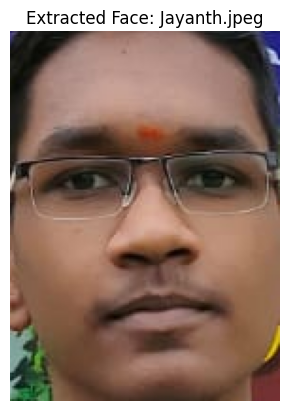

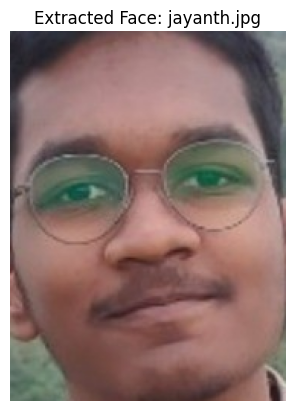

Are they the same person? True


In [15]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import os

# List of backends to try
BACKENDS = ["retinaface", "mtcnn", "opencv", "ssd", "dlib"]

# Function to detect face in an image using DeepFace
def detect_face(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None, None

    for backend in BACKENDS:
        try:
            print(f"Trying backend: {backend} for {image_path}")
            face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend=backend)
            if face_objs:
                face = face_objs[0]['face']
                facial_area = face_objs[0]['facial_area']
                print(f"Face detected using {backend} for {image_path}")
                return face, facial_area  # Return the extracted face and bounding box
        except Exception as e:
            print(f"Backend {backend} failed for {image_path}: {e}")

    print(f"Failed to detect face in {image_path} using all backends.")
    return None, None

# Function to display extracted faces
def display_faces(image_path, facial_area):
    if facial_area is not None:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if isinstance(facial_area, dict) and all(k in facial_area for k in ["x", "y", "w", "h"]):
            x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
            cropped_face = img[y:y+h, x:x+w]

            plt.imshow(cropped_face)
            plt.axis("off")
            plt.title(f"Extracted Face: {os.path.basename(image_path)}")
            plt.show()
        else:
            print(f"Invalid facial_area format for {image_path}.")
    else:
        print(f"Cannot display face for {image_path}.")

# Function to compare two images
def compare_faces(image1_path, image2_path):
    try:
        result = DeepFace.verify(image1_path, image2_path, model_name='VGG-Face')
        return result
    except Exception as e:
        print(f"Error comparing faces: {e}")
        return None

# Image paths
image1_path = "/content/drive/MyDrive/Personal_Images/Jayanth.jpeg"  # Update as needed
image2_path = "/content/drive/MyDrive/Personal_Images/jayanth.jpg"  # Update as needed

# Detect faces with automatic backend switching
face1, facial_area1 = detect_face(image1_path)
face2, facial_area2 = detect_face(image2_path)

# If both faces are detected, proceed with comparison
if face1 is not None and face2 is not None:
    print("Both faces detected successfully!")

    # Display the extracted faces
    display_faces(image1_path, facial_area1)
    display_faces(image2_path, facial_area2)

    # Compare faces
    comparison_result = compare_faces(image1_path, image2_path)
    if comparison_result:
        print("Are they the same person?", comparison_result["verified"])
    else:
        print("Comparison failed.")
else:
    print("Face extraction failed for one or both images.")


Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jay_mattai.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jay_mattai.jpg
Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Both faces detected successfully!


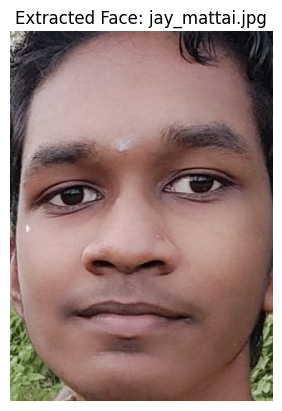

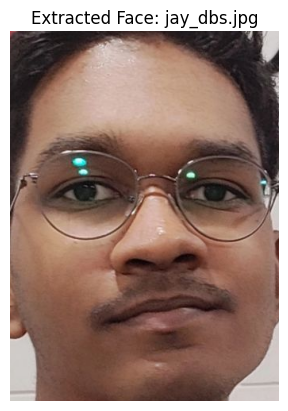

Are they the same person? True


In [16]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import os

# List of backends to try
BACKENDS = ["retinaface", "mtcnn", "opencv", "ssd", "dlib"]

# Function to detect face in an image using DeepFace
def detect_face(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None, None

    for backend in BACKENDS:
        try:
            print(f"Trying backend: {backend} for {image_path}")
            face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend=backend)
            if face_objs:
                face = face_objs[0]['face']
                facial_area = face_objs[0]['facial_area']
                print(f"Face detected using {backend} for {image_path}")
                return face, facial_area  # Return the extracted face and bounding box
        except Exception as e:
            print(f"Backend {backend} failed for {image_path}: {e}")

    print(f"Failed to detect face in {image_path} using all backends.")
    return None, None

# Function to display extracted faces
def display_faces(image_path, facial_area):
    if facial_area is not None:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if isinstance(facial_area, dict) and all(k in facial_area for k in ["x", "y", "w", "h"]):
            x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
            cropped_face = img[y:y+h, x:x+w]

            plt.imshow(cropped_face)
            plt.axis("off")
            plt.title(f"Extracted Face: {os.path.basename(image_path)}")
            plt.show()
        else:
            print(f"Invalid facial_area format for {image_path}.")
    else:
        print(f"Cannot display face for {image_path}.")

# Function to compare two images
def compare_faces(image1_path, image2_path):
    try:
        result = DeepFace.verify(image1_path, image2_path, model_name='VGG-Face')
        return result
    except Exception as e:
        print(f"Error comparing faces: {e}")
        return None

# Image paths
image1_path = "/content/drive/MyDrive/Personal_Images/jay_mattai.jpg"  # Update as needed
image2_path = "/content/drive/MyDrive/Personal_Images/jay_dbs.jpg"  # Update as needed

# Detect faces with automatic backend switching
face1, facial_area1 = detect_face(image1_path)
face2, facial_area2 = detect_face(image2_path)

# If both faces are detected, proceed with comparison
if face1 is not None and face2 is not None:
    print("Both faces detected successfully!")

    # Display the extracted faces
    display_faces(image1_path, facial_area1)
    display_faces(image2_path, facial_area2)

    # Compare faces
    comparison_result = compare_faces(image1_path, image2_path)
    if comparison_result:
        print("Are they the same person?", comparison_result["verified"])
    else:
        print("Comparison failed.")
else:
    print("Face extraction failed for one or both images.")


Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jay_old.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jay_old.jpg
Both faces detected successfully!


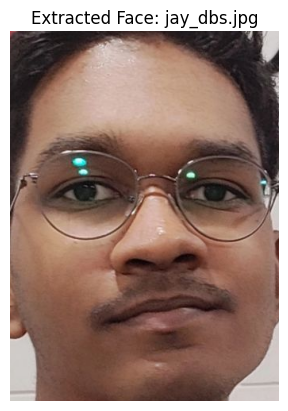

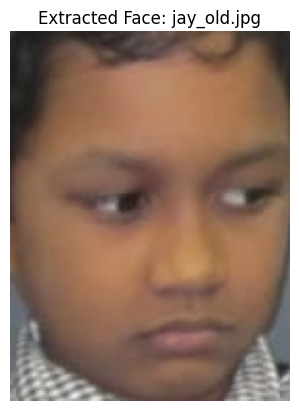

Are they the same person? False


In [25]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import os

# List of backends to try
BACKENDS = ["retinaface", "mtcnn", "opencv", "ssd", "dlib"]

# Function to detect face in an image using DeepFace
def detect_face(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None, None

    for backend in BACKENDS:
        try:
            print(f"Trying backend: {backend} for {image_path}")
            face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend=backend)
            if face_objs:
                face = face_objs[0]['face']
                facial_area = face_objs[0]['facial_area']
                print(f"Face detected using {backend} for {image_path}")
                return face, facial_area  # Return the extracted face and bounding box
        except Exception as e:
            print(f"Backend {backend} failed for {image_path}: {e}")

    print(f"Failed to detect face in {image_path} using all backends.")
    return None, None

# Function to display extracted faces
def display_faces(image_path, facial_area):
    if facial_area is not None:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if isinstance(facial_area, dict) and all(k in facial_area for k in ["x", "y", "w", "h"]):
            x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
            cropped_face = img[y:y+h, x:x+w]

            plt.imshow(cropped_face)
            plt.axis("off")
            plt.title(f"Extracted Face: {os.path.basename(image_path)}")
            plt.show()
        else:
            print(f"Invalid facial_area format for {image_path}.")
    else:
        print(f"Cannot display face for {image_path}.")

# Function to compare two images
def compare_faces(image1_path, image2_path):
    try:
        result = DeepFace.verify(image1_path, image2_path, model_name='VGG-Face')
        return result
    except Exception as e:
        print(f"Error comparing faces: {e}")
        return None

# Image paths
image1_path = "/content/drive/MyDrive/Personal_Images/jay_dbs.jpg"  # Update as needed
image2_path = "/content/drive/MyDrive/Personal_Images/jay_old.jpg"  # Update as needed

# Detect faces with automatic backend switching
face1, facial_area1 = detect_face(image1_path)
face2, facial_area2 = detect_face(image2_path)

# If both faces are detected, proceed with comparison
if face1 is not None and face2 is not None:
    print("Both faces detected successfully!")

    # Display the extracted faces
    display_faces(image1_path, facial_area1)
    display_faces(image2_path, facial_area2)

    # Compare faces
    comparison_result = compare_faces(image1_path, image2_path)
    if comparison_result:
        print("Are they the same person?", comparison_result["verified"])
    else:
        print("Comparison failed.")
else:
    print("Face extraction failed for one or both images.")


Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jay_old.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jay_old.jpg
Both faces detected successfully!


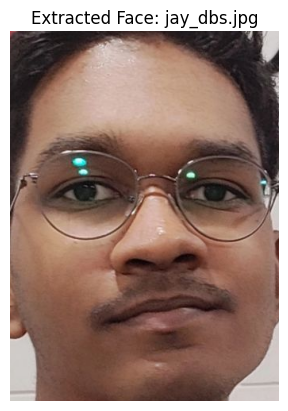

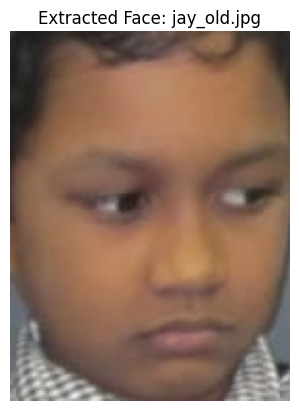

Comparing using model: ArcFace
Comparing using model: Facenet
Comparing using model: VGG-Face
High distance detected, adjusting threshold...
Same person! (Avg Distance: 0.654, Confidence: 34.61%)


In [43]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Ordered list of backends (Fastest & Most Accurate First)
BACKENDS = ["retinaface", "mtcnn", "opencv", "ssd", "dlib"]

# Ordered list of face recognition models (Most Accurate First)
MODELS = ["ArcFace", "Facenet", "VGG-Face"]

# Function to detect face in an image using multiple backends
def detect_face(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None, None

    for backend in BACKENDS:
        try:
            print(f"Trying backend: {backend} for {image_path}")
            face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend=backend)
            if face_objs:
                face = face_objs[0]['face']
                facial_area = face_objs[0]['facial_area']
                print(f"Face detected using {backend} for {image_path}")
                return face, facial_area  # Return face and bounding box
        except Exception as e:
            print(f"Backend {backend} failed for {image_path}: {e}")

    print(f"Failed to detect face in {image_path} using all backends.")
    return None, None

# Function to display extracted faces
def display_faces(image_path, facial_area):
    if facial_area is not None:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if isinstance(facial_area, dict) and all(k in facial_area for k in ["x", "y", "w", "h"]):
            x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
            cropped_face = img[y:y+h, x:x+w]

            plt.imshow(cropped_face)
            plt.axis("off")
            plt.title(f"Extracted Face: {os.path.basename(image_path)}")
            plt.show()
        else:
            print(f"Invalid facial_area format for {image_path}.")
    else:
        print(f"Cannot display face for {image_path}.")

def compare_faces_ensemble(image1_path, image2_path, base_threshold=0.55):
    votes = []
    distances = []
    confidences = []

    for model in MODELS:
        try:
            print(f"Comparing using model: {model}")
            result = DeepFace.verify(image1_path, image2_path, model_name=model, distance_metric="cosine")
            distance = result["distance"]
            distances.append(distance)

            # Convert distance to confidence score (Cosine Similarity)
            confidence = (1 - distance) * 100
            confidences.append(confidence)

            votes.append(distance < base_threshold)  # Match if distance is below threshold
        except Exception as e:
            print(f"Model {model} failed: {e}")

    if len(votes) == 0:
        print("All models failed.")
        return False, None, None

    avg_distance = np.mean(distances) if distances else None
    avg_confidence = np.mean(confidences) if confidences else None

    # **Adaptive Threshold Adjustment**
    if avg_distance is not None:
        if avg_distance > 0.6:
            print("High distance detected, adjusting threshold...")
            base_threshold += 0.14  # Increase threshold for older photos

    is_match = avg_distance < base_threshold

    return is_match, avg_distance, avg_confidence



# Image paths
image1_path = "/content/drive/MyDrive/Personal_Images/jay_dbs.jpg"  # Newer photo
image2_path = "/content/drive/MyDrive/Personal_Images/jay_old.jpg"  # Older photo

# Detect faces with automatic backend switching
face1, facial_area1 = detect_face(image1_path)
face2, facial_area2 = detect_face(image2_path)

# If both faces are detected, proceed with comparison
if face1 is not None and face2 is not None:
    print("Both faces detected successfully!")

    # Display extracted faces
    display_faces(image1_path, facial_area1)
    display_faces(image2_path, facial_area2)

    match, avg_dist, avg_conf = compare_faces_ensemble(image1_path, image2_path)

    # Output results
    if match:
        print(f"Same person! (Avg Distance: {avg_dist:.3f}, Confidence: {avg_conf:.2f}%)")
    else:
        print(f"Not the same person (Avg Distance: {avg_dist:.3f}, Confidence: {avg_conf:.2f}%)")
else:
    print("Face extraction failed for one or both images.")


Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jay_mattai.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jay_mattai.jpg
Both faces detected successfully!


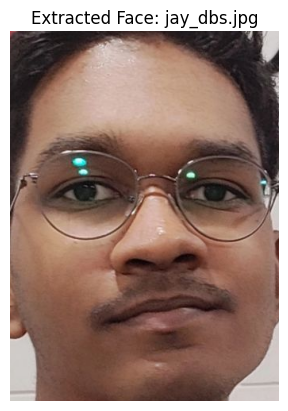

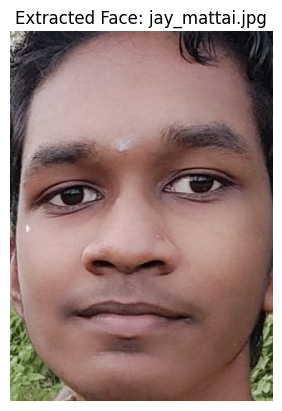

Comparing using model: ArcFace
Comparing using model: Facenet
Comparing using model: VGG-Face
Same person! (Avg Distance: 0.316, Confidence: 68.38%)


In [45]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Ordered list of backends (Fastest & Most Accurate First)
BACKENDS = ["retinaface", "mtcnn", "opencv", "ssd", "dlib"]

# Ordered list of face recognition models (Most Accurate First)
MODELS = ["ArcFace", "Facenet", "VGG-Face"]

# Function to detect face in an image using multiple backends
def detect_face(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None, None

    for backend in BACKENDS:
        try:
            print(f"Trying backend: {backend} for {image_path}")
            face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend=backend)
            if face_objs:
                face = face_objs[0]['face']
                facial_area = face_objs[0]['facial_area']
                print(f"Face detected using {backend} for {image_path}")
                return face, facial_area  # Return face and bounding box
        except Exception as e:
            print(f"Backend {backend} failed for {image_path}: {e}")

    print(f"Failed to detect face in {image_path} using all backends.")
    return None, None

# Function to display extracted faces
def display_faces(image_path, facial_area):
    if facial_area is not None:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if isinstance(facial_area, dict) and all(k in facial_area for k in ["x", "y", "w", "h"]):
            x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
            cropped_face = img[y:y+h, x:x+w]

            plt.imshow(cropped_face)
            plt.axis("off")
            plt.title(f"Extracted Face: {os.path.basename(image_path)}")
            plt.show()
        else:
            print(f"Invalid facial_area format for {image_path}.")
    else:
        print(f"Cannot display face for {image_path}.")

def compare_faces_ensemble(image1_path, image2_path, base_threshold=0.55):
    votes = []
    distances = []
    confidences = []

    for model in MODELS:
        try:
            print(f"Comparing using model: {model}")
            result = DeepFace.verify(image1_path, image2_path, model_name=model, distance_metric="cosine")
            distance = result["distance"]
            distances.append(distance)

            # Convert distance to confidence score (Cosine Similarity)
            confidence = (1 - distance) * 100
            confidences.append(confidence)

            votes.append(distance < base_threshold)  # Match if distance is below threshold
        except Exception as e:
            print(f"Model {model} failed: {e}")

    if len(votes) == 0:
        print("All models failed.")
        return False, None, None

    avg_distance = np.mean(distances) if distances else None
    avg_confidence = np.mean(confidences) if confidences else None

    # **Adaptive Threshold Adjustment**
    if avg_distance is not None:
        if avg_distance > 0.6:
            print("High distance detected, adjusting threshold...")
            base_threshold += 0.14  # Increase threshold for older photos

    is_match = avg_distance < base_threshold

    return is_match, avg_distance, avg_confidence



# Image paths
image1_path = "/content/drive/MyDrive/Personal_Images/jay_dbs.jpg"  # Newer photo
image2_path = "/content/drive/MyDrive/Personal_Images/jay_mattai.jpg"  # Older photo

# Detect faces with automatic backend switching
face1, facial_area1 = detect_face(image1_path)
face2, facial_area2 = detect_face(image2_path)

# If both faces are detected, proceed with comparison
if face1 is not None and face2 is not None:
    print("Both faces detected successfully!")

    # Display extracted faces
    display_faces(image1_path, facial_area1)
    display_faces(image2_path, facial_area2)

    match, avg_dist, avg_conf = compare_faces_ensemble(image1_path, image2_path)

    # Output results
    if match:
        print(f"Same person! (Avg Distance: {avg_dist:.3f}, Confidence: {avg_conf:.2f}%)")
    else:
        print(f"Not the same person (Avg Distance: {avg_dist:.3f}, Confidence: {avg_conf:.2f}%)")
else:
    print("Face extraction failed for one or both images.")


Trying backend: retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Face detected using retinaface for /content/drive/MyDrive/Personal_Images/jay_dbs.jpg
Trying backend: retinaface for /content/drive/MyDrive/HongKong_Dataset/new_hkid_front.png
Face detected using retinaface for /content/drive/MyDrive/HongKong_Dataset/new_hkid_front.png
Both faces detected successfully!


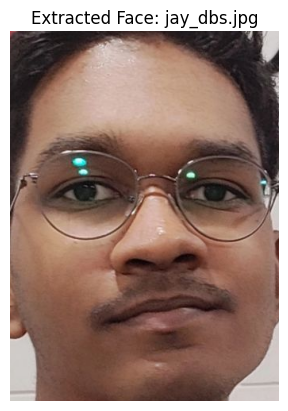

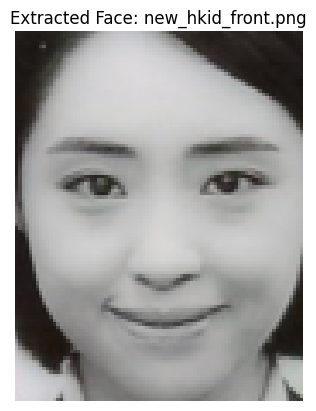

🔍 Comparing using model: ArcFace
🔍 Comparing using model: Facenet
🔍 Comparing using model: VGG-Face
High distance detected, adjusting threshold...
❌ Not the same person (Avg Distance: 0.824, Confidence: 17.60%)


In [46]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Ordered list of backends (Fastest & Most Accurate First)
BACKENDS = ["retinaface", "mtcnn", "opencv", "ssd", "dlib"]

# Ordered list of face recognition models (Most Accurate First)
MODELS = ["ArcFace", "Facenet", "VGG-Face"]

# Function to detect face in an image using multiple backends
def detect_face(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None, None

    for backend in BACKENDS:
        try:
            print(f"Trying backend: {backend} for {image_path}")
            face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend=backend)
            if face_objs:
                face = face_objs[0]['face']
                facial_area = face_objs[0]['facial_area']
                print(f"Face detected using {backend} for {image_path}")
                return face, facial_area  # Return face and bounding box
        except Exception as e:
            print(f"Backend {backend} failed for {image_path}: {e}")

    print(f"Failed to detect face in {image_path} using all backends.")
    return None, None

# Function to display extracted faces
def display_faces(image_path, facial_area):
    if facial_area is not None:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if isinstance(facial_area, dict) and all(k in facial_area for k in ["x", "y", "w", "h"]):
            x, y, w, h = facial_area["x"], facial_area["y"], facial_area["w"], facial_area["h"]
            cropped_face = img[y:y+h, x:x+w]

            plt.imshow(cropped_face)
            plt.axis("off")
            plt.title(f"Extracted Face: {os.path.basename(image_path)}")
            plt.show()
        else:
            print(f"Invalid facial_area format for {image_path}.")
    else:
        print(f"Cannot display face for {image_path}.")

def compare_faces_ensemble(image1_path, image2_path, base_threshold=0.55):
    votes = []
    distances = []
    confidences = []

    for model in MODELS:
        try:
            print(f"🔍 Comparing using model: {model}")
            result = DeepFace.verify(image1_path, image2_path, model_name=model, distance_metric="cosine")
            distance = result["distance"]
            distances.append(distance)

            # Convert distance to confidence score (Cosine Similarity)
            confidence = (1 - distance) * 100
            confidences.append(confidence)

            votes.append(distance < base_threshold)  # Match if distance is below threshold
        except Exception as e:
            print(f"Model {model} failed: {e}")

    if len(votes) == 0:
        print("All models failed.")
        return False, None, None

    avg_distance = np.mean(distances) if distances else None
    avg_confidence = np.mean(confidences) if confidences else None

    # **Adaptive Threshold Adjustment**
    if avg_distance is not None:
        if avg_distance > 0.6:
            print("High distance detected, adjusting threshold...")
            base_threshold += 0.14  # Increase threshold for older photos

    is_match = avg_distance < base_threshold

    return is_match, avg_distance, avg_confidence



# Image paths
image1_path = "/content/drive/MyDrive/Personal_Images/jay_dbs.jpg"  # Newer photo
image2_path = "/content/drive/MyDrive/HongKong_Dataset/new_hkid_front.png"  # Older photo

# Detect faces with automatic backend switching
face1, facial_area1 = detect_face(image1_path)
face2, facial_area2 = detect_face(image2_path)

# If both faces are detected, proceed with comparison
if face1 is not None and face2 is not None:
    print("Both faces detected successfully!")

    # Display extracted faces
    display_faces(image1_path, facial_area1)
    display_faces(image2_path, facial_area2)

    match, avg_dist, avg_conf = compare_faces_ensemble(image1_path, image2_path)

    # Output results
    if match:
        print(f"✅ Same person! (Avg Distance: {avg_dist:.3f}, Confidence: {avg_conf:.2f}%)")
    else:
        print(f"❌ Not the same person (Avg Distance: {avg_dist:.3f}, Confidence: {avg_conf:.2f}%)")
else:
    print("Face extraction failed for one or both images.")


In [40]:
analysis = DeepFace.analyze(img_path="/content/drive/MyDrive/Personal_Images/jay_mattai.jpg", actions=["age", "gender", "emotion", "race"])
print(analysis)

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

[{'age': 24, 'region': {'x': 840, 'y': 183, 'w': 428, 'h': 428, 'left_eye': (1123, 350), 'right_eye': (978, 366)}, 'face_confidence': 0.87, 'gender': {'Woman': 0.03358633257448673, 'Man': 99.96641874313354}, 'dominant_gender': 'Man', 'emotion': {'angry': 3.9303377270698547, 'disgust': 2.8081507252863958e-05, 'fear': 8.548766374588013, 'happy': 0.04678044642787427, 'sad': 4.715600237250328, 'surprise': 0.06484198966063559, 'neutral': 82.69364833831787}, 'dominant_emotion': 'neutral', 'race': {'asian': 27.53528356552124, 'indian': 26.467451453208923, 'black': 20.398254692554474, 'white': 2.11421437561512, 'middle eastern': 1.812506653368473, 'latino hispanic': 21.672289073467255}, 'dominant_race': 'asian'}]
